## 3. 앙상블(ensemble)


### 3.0 개념
- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 방법이다.
- 편향, 잡음, 분산으로 인한 오류와 같은 문제를 회피하기 위해 사용된다.
- 의사결정나무에서 주로 사용한다. (과적합을 막기 위함)
- 배깅(bagging), 부스팅(boosting), 랜덤 포레스트(random forest)가 가장 대표적
- 스태킹 알고리즘(앙상블과 유사하지만 예측 결과를 종합하는 것이 다른 점)
  - 여러 모델들을 활용해 각각의 예측 결과를 도출한 뒤 그 예측 결과를 다시 학습하여 최종 예측 결과를 만들어내는 방법

### 3.1 배깅과 부스팅

#### 3.1.1 배깅 개념
+ 부스트랩(Boostrap)
> 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법(중복허용)을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법  
주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산

__Out of bag sample__  
> boostrapping 을 수행하면 평균적으로 각 예측기에 훈련 데이터의 63% 정도만 샘플링 되는데, 이 때 선택되지 않은 나머지 37%를 Out of bag 샘플이라고 한다.(예측기마다 남겨진 37% 는 모두 다름)  
oob_score = True 설정하면 oob 데이터를 모델의 평가를 위해 사용한다.(검증 세트나 교차 검증이 필요없음)

+ 주어진 자료를 모집단으로 생각하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각 부스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방법
+ 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 피하도록 함
+ 보팅(voting) : 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 선정하는 과정
+ 최적 의사결정 나무 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 나무를 최대로 성장시킨 후 보팅함
+ 훈련자료의 모집단의 분포를 몰라 평균예측모형을 구할 수 없다는 문제를 해결하기 위해 훈련 자료를 모집단으로 생각하고 평균예측모형을 구해 분산을 줄이고 예측력을 향상시킴

+ 부스팅과의 차이점
  - 주어진 자료보다 분산이 적은 앙상블 모델을 얻는데 중점을 둠
  - 각 부스트랩에 대해 부스트래핑 및 모델링 과정이 병렬적으로 수행됨


> sklearn.ensemble.BaggingClassifier(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)



> sklearn.ensemble.BaggingRegressor(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)
```

> base_estimator : 배깅에서 수행할 분류기로 None 이면 DecisionTreeClassifier/DecisionTreeRegressor 를 수행  
n_estimators : 앙상블의 분류기 모델의 수 (int, default = 10)  
max_samples : 각 기본 추정량을 훈련하기 위해 추출할 샘플 수 (int or float, default = 1.0)  
max_features : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수 (int or float, default = 1.0)  
boostrap : 샘플(행)을 복원추출할 지 여부 (bool, default = True)  
boostrap_features : feature(열)를 복원추출할 지 여부 (bool, default = True)  
oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할 지 여부 (bool, default = False)

> BaggingRegressor().fit(X,y) # 모델 적합  
BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측  
BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

#### 3.1.2 부스팅 개념
+ 예측력이 약한 모형들을 결합하여 강한 예측모형을 만드는 방법이다.
+ 부스트랩을 병렬로 수행(각 모델을 독립적으로 구축)하는 배깅과 달리 순차방식으로 학습을 진행한다.
+ 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
+ train 데이터에 과적합할 위험이 있다.

분류의 경우
>sklearn.ensemble.AdaBoostClassifier(base_estimator = None, n_estimators = 50, learning_rate = 1.0)


회귀의 경우
>sklearn.ensemble.AdaBoostRegressor(base_estimator = None, n_estimators = 50, learning_rate = 1.0)

base_estimator : 부스팅에서 수행할 분류기로 None 이면 DecisionTreeClassifier/DecisionTreeRegressor 을 수행  
n_estimators : 부스팅이 종료되는 최대 분류기의 수 (int, default = 50)

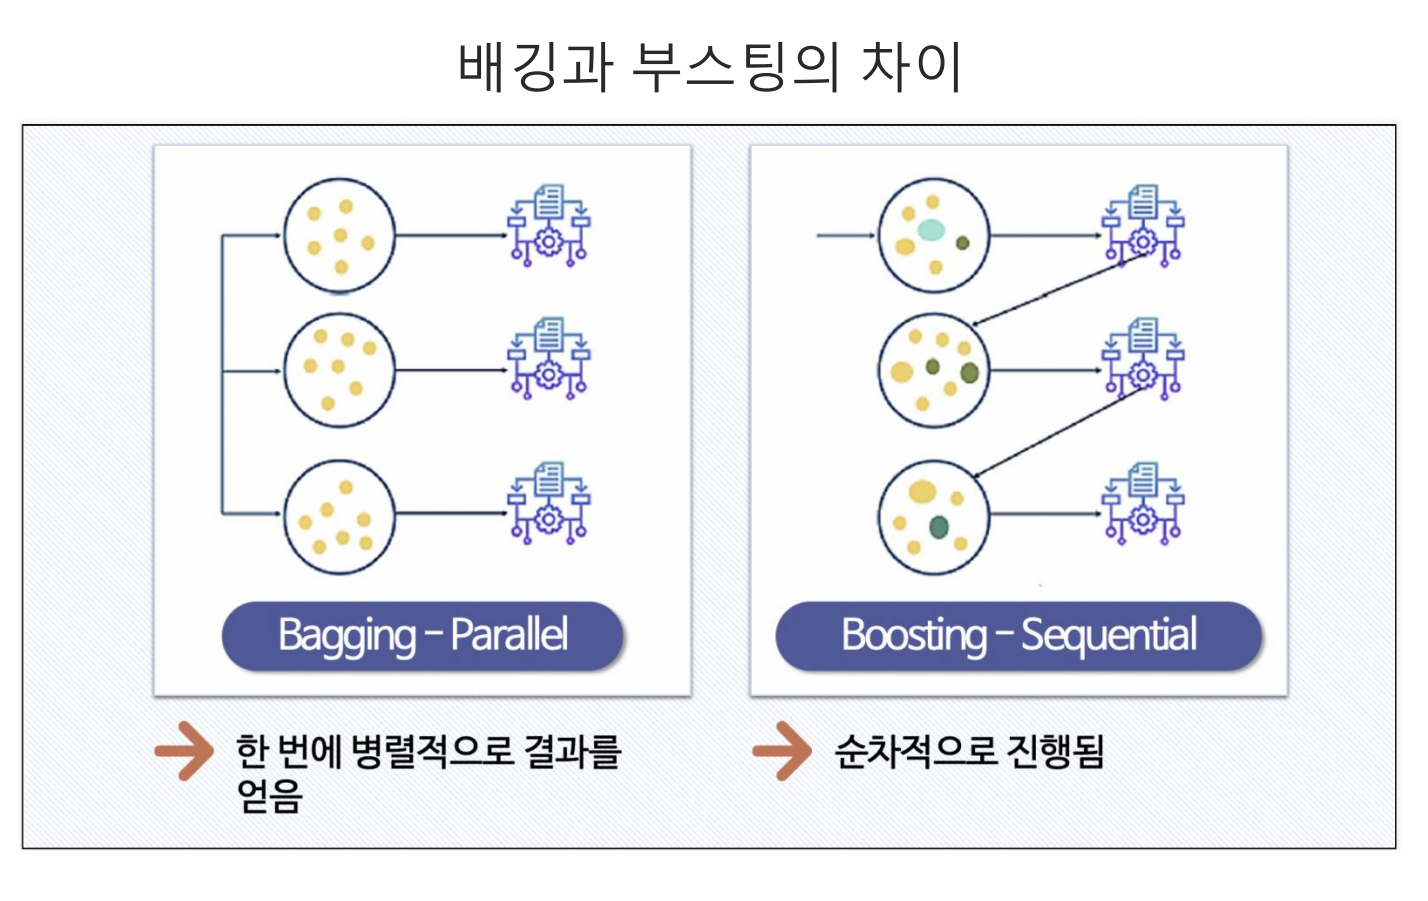

### 3.2 배깅

#### 3.2.1 배깅(회귀)

> sklearn.ensembl.BaggingRegressor(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)

- BaggingRegressor().fit(X,y) # 모델 적합  
- BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측  
- BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

[예제]  
kc_house_data.csv 를 train 과 test 데이터로 분할하고 train 데이터를 활용하여 BaggingRegressor 모델을 만들어라

In [64]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [65]:
X = kc_house.drop(['id', 'date', 'price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
bag_reg = BaggingRegressor(n_estimators=100, oob_score=False, random_state=42)
bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)

print('train r2 :', bag_reg.score(X_train, y_train))
print('test r2 :', bag_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

train r2 : 0.9660799909177326
test r2 : 0.7208387853636247
mse : 40301536313.19847
rmse : 200752.4254229534


In [68]:
# Out of Bag 샘플을 활용한 성능 측정
bag_reg_oob = BaggingRegressor(n_estimators=100, oob_score=True, random_state= 42)
bag_reg_oob.fit(X, y)

print('oob score :', bag_reg_oob.oob_score_)

oob score : 0.7546241786932004


In [69]:
bag_reg.estimators_[0].feature_importances_

array([0.0066171 , 0.02905109, 0.24311789, 0.04326411, 0.00415817,
       0.01687747, 0.00555852, 0.38826751, 0.02852556, 0.00994227,
       0.0821405 , 0.00306987, 0.08513434, 0.0370829 , 0.00659947,
       0.01059323])

                 col_name  feature_importances
0                   grade             0.373876
1             sqft_living             0.266710
2                yr_built             0.097747
3           sqft_living15             0.062083
4              sqft_lot15             0.038036
5                sqft_lot             0.032870
6              sqft_above             0.026989
7               bathrooms             0.024913
8                    view             0.018402
9           sqft_basement             0.014671
10    waterfront_standard             0.010500
11  waterfront_river_view             0.009238
12               bedrooms             0.007414
13              condition             0.007368
14                 floors             0.005432
15           yr_renovated             0.003751

[변수 중요도 시각화]


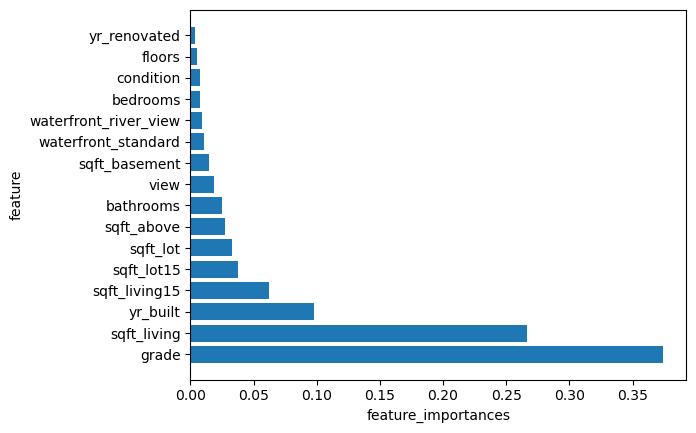

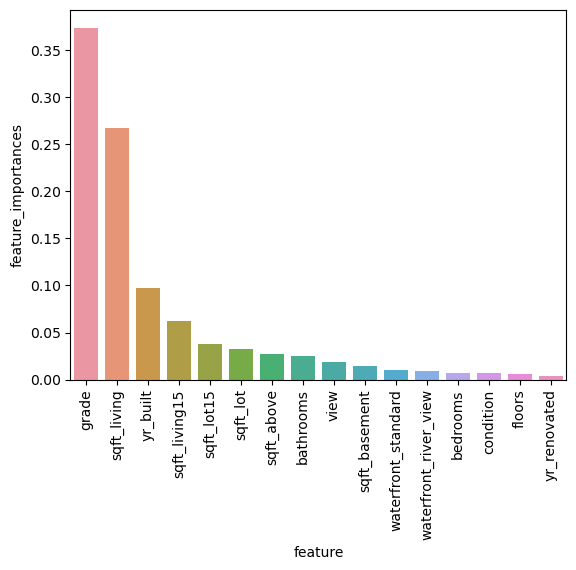

In [70]:
# 변수 중요도 확인
# 변수의 상대적 중요도를 보았을 때 회귀 계수처럼 파악을 할 수 있다.
# 변수 중요도가 큰 것을 파악할 수 있음

importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in bag_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importances']
feature_importances = feature_importances.sort_values(by = 'feature_importances', ascending= False).reset_index(drop = True)
print(feature_importances)
print()

# 변수 중요도 시각화
import matplotlib.pyplot as plt
print('[변수 중요도 시각화]')
plt.barh(feature_importances['col_name'], feature_importances['feature_importances'])
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.show()

import seaborn as sns
sns.barplot(data = feature_importances, x = 'col_name' , y = 'feature_importances')
plt.xticks(rotation = 90)
plt.ylabel('feature_importances')
plt.xlabel('feature')
plt.show()

#### 3.2.2 배깅(분류)

> sklearn.ensembl.BaggingClassifier(base_estimator = None, n_estimatos = 10,
                                  max_samples = 1.0, max_features = 1.0,
                                  boostrap = True, boostrap_features = False, oob_score = False)


> BaggingClassifier().fit(X, Y) # 모델 적합  
BaggingClassifier().predict(X) # 모델을 사용하여 분류 결과 예측  
BaggingClassifier().predict_proba(X) # X의 각 행에 대해 Y 값의 각 클래스 확률  
BaggingClassifier().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

[예제]  
credit 데이터를 train과 test 데이터로 분할하고 train 데이터를 활용하여 Bagging 모델을 만들어라

In [71]:
import pandas as pd
import numpy as np

# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit.columns = credit.columns.str.replace('.', '_')

credit.head()

,credit_rating,account_balance,credit_duration_months,previous_credit_payment_status,credit_purpose,credit_amount,savings,employment_duration,installment_rate,marital_status,...,residence_duration,current_assets,age,other_credits,apartment_type,bank_credits,occupation,dependents,telephone,foreign_worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [75]:
X = credit.drop(['credit_rating'], axis = 1)
y = credit['credit_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

# 분류기 100개 생성, 샘플의 100%(복원추출)와 컬럼 모두의 무작위 하위집합을 기반으로 함
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=100, max_samples = 1.0, max_features=1.0)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

      pred_T[0]  pred_F[1]
T[0]         43         47
F[1]         19        191
precision score : 0.8025210084033614
f1 score : 0.8526785714285714
recall score : 0.9095238095238095
roc_auc score : 0.7859523809523811


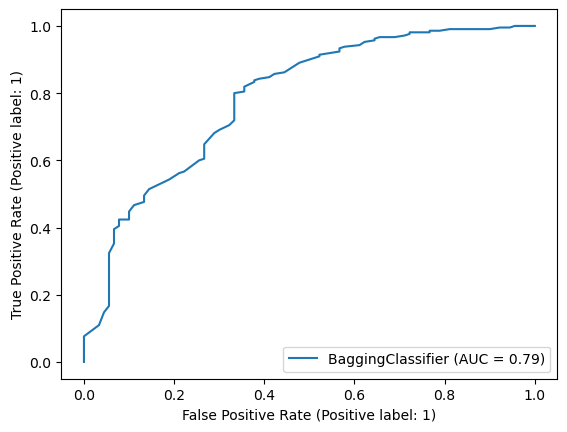

              precision    recall  f1-score   support

           0       0.69      0.48      0.57        90
           1       0.80      0.91      0.85       210

    accuracy                           0.78       300
   macro avg       0.75      0.69      0.71       300
weighted avg       0.77      0.78      0.77       300



In [76]:
# 모델 성능지표
# 오차행렬
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[1]'], columns = ['pred_T[0]', 'pred_F[1]']))

# 지표
print('precision score :', precision_score(y_test, y_pred))
print('f1 score :', f1_score(y_test, y_pred))
print('recall score :', recall_score(y_test, y_pred))
print('roc_auc score :', roc_auc_score(y_test, bag_clf.predict_proba(X_test)[:,1]))

# ROC cuve 시각화
RocCurveDisplay.from_estimator(bag_clf, X_test, y_test)
plt.show()

# 분류표
print(classification_report(y_test, y_pred))

__ROC 곡선__
+ x축은 특이도, y축은 재현율(민감도)을 가지는 그래프
+ 재현율(TPR)은 1이고, 특이도(FPR)는 0인 경우가 가장 이상적
> 재현율 : 실제 True 일 때 True 라고 예측하는 비율  
특이도 : 실제 False 일 때 False 라고 예측하는 비율

__AUC__
+ ROC 곡선의 아래 면적을 계산한 것으로 값이 클수록 모델의 성능이 좋다고 판단 가능

__roc_auc_score__
+ 이진 분류 : roc_auc_score(Y, clf.predict_proba(X)[:,1])
+ 다중 분류 : roc_auc_score(y, clf.predict_proba(X), multi_class = 'ovr)
+ 여러 개의 라벨을 분류 : roc_auc_score(y, y_pred, average = None)

In [74]:
# Out of Bag 샘플을 활용한 성능 측정
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=100, max_features=1.0, max_samples=1.0, oob_score = True)
bag_clf.fit(X,y)
print('oob score :', bag_clf.oob_score_)

oob score : 0.761


In [82]:
bag_clf.estimators_[0].feature_importances_

array([0.13330486, 0.08333566, 0.09111287, 0.04890763, 0.1417401 ,
       0.0483698 , 0.04076231, 0.04212534, 0.02194197, 0.03571932,
       0.05845897, 0.06792671, 0.11968707, 0.00861493, 0.        ,
       0.02464999, 0.00709465, 0.        , 0.01163016, 0.01461769])

                          col_name  feature_importances
0                    credit_amount             0.172845
1           credit_duration_months             0.122952
2                  account_balance             0.120673
3                              age             0.108459
4                          savings             0.051713
5                   credit_purpose             0.050956
6                   current_assets             0.047993
7   previous_credit_payment_status             0.042803
8              employment_duration             0.042699
9               residence_duration             0.040853
10                installment_rate             0.034892
11                      occupation             0.033693
12                  marital_status             0.028387
13                    bank_credits             0.019931
14                  apartment_type             0.018275
15                       guarantor             0.017937
16                   other_credits             0

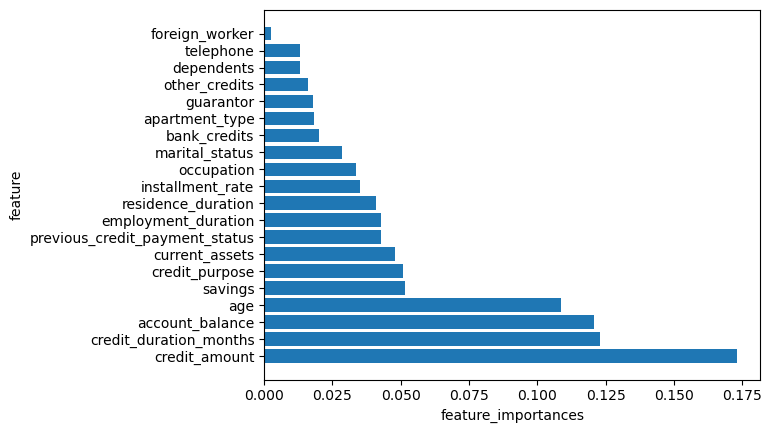

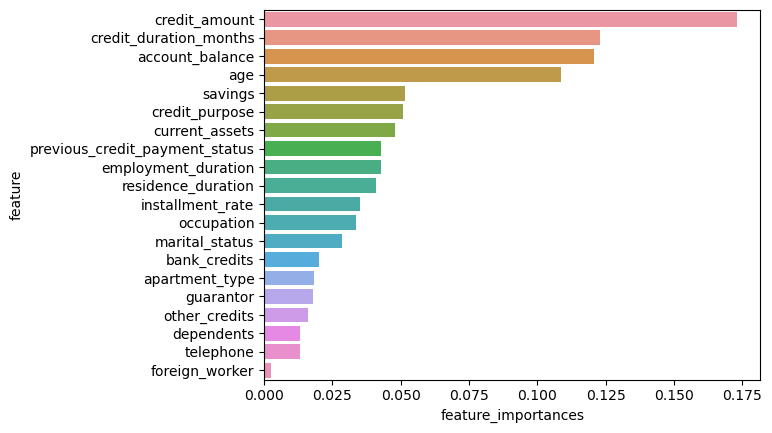

In [98]:
# 변수 중요도 확인
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis =0))
feature_importances = pd.concat([pd.DataFrame(X.columns),importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importances']
feature_importances = feature_importances.sort_values(by = 'feature_importances', ascending= False).reset_index(drop =True)
print(feature_importances)

# 변수 중요도 시각화
plt.barh(feature_importances['col_name'] ,feature_importances['feature_importances'])
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.show()

sns.barplot(data = feature_importances, x = 'feature_importances', y = 'col_name')
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.show()

### 3.3 랜덤 포레스트(Random Forest)

+ 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법
+ 수천 개의 변수를 변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보임
+ 이론적 설명이나 최종 결과에 대한 해석이 어렵다는 단점이 있지만 예측력이 매우 높은 것으로 알려져 있음
+ 입력변수가 많은 경우 배깅과 부스팅과 비슷하거나 좋은 예측력을 보임

회귀의 경우
>sklearn.ensemble.RandomForestRegressor(...)

분류의 경우
>sklearn.ensemble.RandomForestClassifier(...)


+ n_estimators : RandomForest 에서 나무의 수 (int, default = 100)
+ criterion : 분할의 품질을 측정하는 방법 ({'gini', 'entropy'}, default = 'gini')
+ max_depth : 나무의 최대 깊이 (int, default = None)
+ min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (int or float, default = 2)
+ min_samples_leaf : 리프 노드에 있어야하는 최소 샘플 수 (int or float, default = 1)
+ max_leaf_nodes : 리프 노드의 최대 개수로 None이면 제한없음 (int, default = None)
+ boostrap : 나무를 만들 때 부스트랩 샘플이 사용되는지 여부 (bool, default = True), False 이면 전체 데이터 세트가 각 트리를 작성하는데 사용
+ oob_score : 정확도 측정을 위해 out-of-bag 샘플을 사용할 지 여부 (bool, default = False)

#### 3.3.1 랜덤 포레스트(회귀)

In [99]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [103]:
X = kc_house.drop(['id', 'date', 'price'], axis = 1)
y = kc_house['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print('train r2 :', rf_reg.score(X_train, y_train))
print('test r2 :', rf_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

train r2 : 0.9650341169578258
test r2 : 0.7230837206935046
mse : 39977442785.96625
rmse : 199943.59901223707


In [106]:
# 변수 중요도
rf_reg.estimators_[0].feature_importances_

array([7.60665955e-03, 5.09447444e-02, 1.82883203e-01, 3.21956239e-02,
       7.32518275e-03, 2.16216928e-02, 6.96899339e-03, 3.97706783e-01,
       2.20670845e-02, 2.69268033e-02, 1.02835955e-01, 3.85133240e-03,
       6.38867917e-02, 4.42041625e-02, 2.86544725e-02, 3.20515102e-04])

                 col_name  feature_importances
0                   grade             0.363359
1             sqft_living             0.273638
2                yr_built             0.097340
3           sqft_living15             0.061617
4              sqft_lot15             0.039731
5                sqft_lot             0.033695
6              sqft_above             0.026951
7               bathrooms             0.023080
8                    view             0.019097
9           sqft_basement             0.014810
10    waterfront_standard             0.012013
11  waterfront_river_view             0.010577
12               bedrooms             0.007455
13              condition             0.007259
14                 floors             0.005450
15           yr_renovated             0.003928


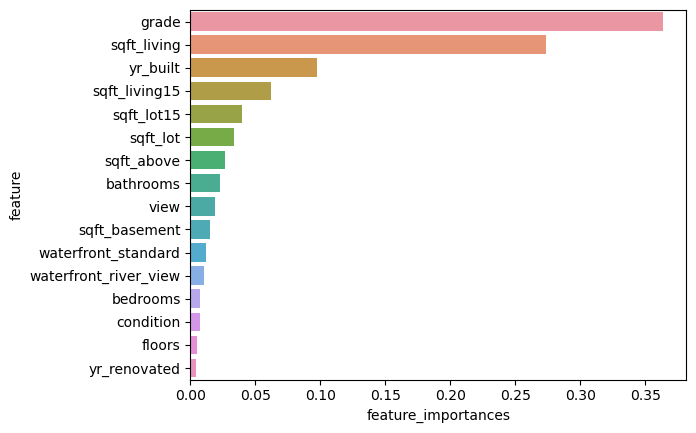

In [115]:
# 변수 중요도
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in rf_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importances']
feature_importances = feature_importances.sort_values(by = 'feature_importances', ascending= False).reset_index(drop = True)
print(feature_importances)

# 변수 중요도 시각화
sns.barplot(data = feature_importances, x = 'feature_importances' , y = 'col_name')
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.show()

Out of Bag 샘플을 활용한 성능 측정

In [118]:
rf_reg = RandomForestRegressor(n_estimators= 50, oob_score= True)
rf_reg.fit(X, y)

print('oob score :', rf_reg.oob_score_)

oob score : 0.7416960241495156


#### 3.3.2 랜덤 포레스트(분류)